# Process example for FEEM data

DESCRIBE THE SAMPLE

In [1]:
% housekeeping
% add scriptpath and OPENFluordatabase
txt=pwd;
n=length(txt);
rootpath=txt; rootpath=txt(1:n-13);
scriptpath=[rootpath,'/FEEMscripts'];
addpath(scriptpath);
OPENFluorpath=[rootpath,'/OPENFluordatabase'];
addpath(OPENFluorpath);
% add  datapath privatedata paths
rootpath=txt; rootpath=txt;
datapath=[rootpath,'/DATA'];
addpath(datapath);
privatepath=[rootpath,'/PRIVATE']; c=exist(privatepath); % only add path if it exists
if c>0; addpath(privatepath); end
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
%graphics_toolkit ("plotly"); 

In [2]:
%input the FEEM data file and DOC conc

% you have to change this to match the data in either the DATA directory
% or the PRIVATE directory.  NOT in both places.

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%5
dataname=['Tyr_test_FEEMdata']; DOC=1; % set to one if normalize does not change data
caxisvalue=[]; % put in a caxisvalue if you want a fixed colour axis (to compare between samples, otherwise it automatically rescales)
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%555

txt=['[data]=',dataname,';']; eval(txt)

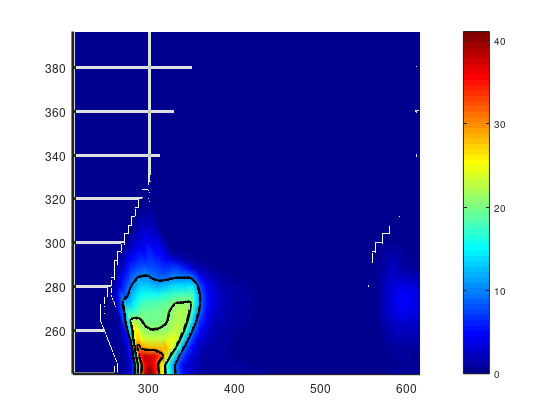

In [3]:
% process the data
scatterfactor=0.01; exmin=240; exmax=400; flagg=0; 
[F,em,ex]=Fprocess(data,scatterfactor,exmin,exmax,flagg);
%interpolate to fill scattered light to make prettier plots
scatterfactor=0.085; %exmin=240; exmax=400; 
stepsize=4; %stepsize is the nm gap on ex and em resampling, if 0 use the original
flagg=0; % no diagnostic plot.  if flag=1 then plot to make sure scatter "zeros" are all gone
[F,em,ex]=FINTERPFILL(data,scatterfactor,exmin,exmax,stepsize,flagg);

if isempty(caxisvalue)==1; caxisvalue=max(max(F./DOC)); end
makecontourplot(F./DOC,em,ex,1); caxis([0 caxisvalue]);   colorbar

In [4]:
% report optical indices

BIX=calcBIX(F,em,ex)
gap=1; HI1=calcHI(F,em,ex,gap)
FI=calcFI(F,em,ex)
[Trp,HA,FA,Tyr,percentdataexplained]=parafaclite(F,em,ex)

BIX = 1.0380e+00


HI1 = 8.0958e-03


FI = 1.3529e+00


Execution exception: 'parafaclite' undefined near line 1, column 38